In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import EulerSolver, plot_1d_slice, initial_conditions
from teyssier.muscl import muscl, cons_to_prim

In [2]:
N = 256
DIMS = "x"
T = 1.0


def analytical_solution(idx, x, y, z, t, xp):
    return initial_conditions.sinus(
        idx,
        x,
        y,
        z,
        t,
        xp=xp,
        vx=1.0,
        bounds=(1.0, 2.0),
        P=1.0,
    )


sim = EulerSolver(
    ic=analytical_solution,
    nx=N,
    riemann_solver="llf",
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter="moncen",
    SED=True,
)

In [3]:
sim.musclhancock(T, allow_overshoot=True)

Step #699 @ t=1.00e+00 | dt=1.43e-03 | min(rho)=1.00e+00, min(P)=1.00e+00 | (done)                  


In [4]:
ut = muscl(
    tend=T,
    n=N,
    ic_type="sinus",
    bc_type="periodic",
    riemann_solver="llf",
    slp_type="moncen2",
)
wt = cons_to_prim(ut[-1])
x = (np.arange(N) + 0.5) / N

cell= 256  itermax= 100000


Done  699 1.0005358954256447


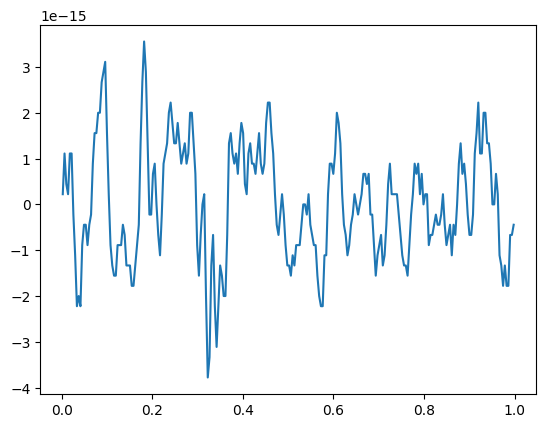

In [5]:
err1 = sim.snapshots[-1]["u"][0, :, 0, 0] - sim.snapshots[0]["u"][0, :, 0, 0]
err2 = wt[0] - sim.snapshots[0]["u"][0, :, 0, 0]
x = sim.mesh.x_centers
# plt.plot(x, err1, label='superfv err')
# plt.plot(x, err2, '--', label='APC-523 err')
plt.plot(x, sim.snapshots[-1]["u"][0, :, 0, 0] - wt[0])
# plt.legend()

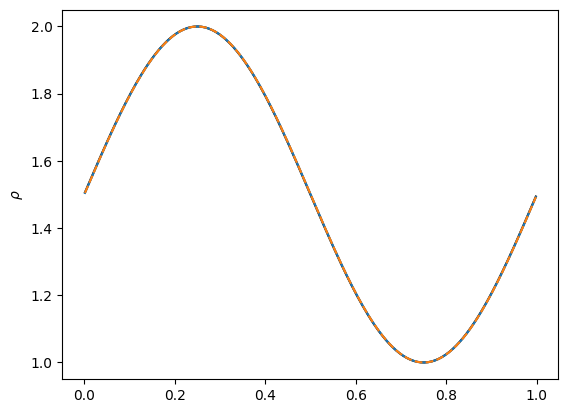

In [6]:
fig, ax = plt.subplots()

ax.set_ylabel(r"$\rho$")

plot_1d_slice(sim, ax, "rho", t=0, color="k")
ax.plot(x, wt[0])
plot_1d_slice(sim, ax, "rho", linestyle="--")